In [2]:
#https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('owid-covid-data.csv', usecols=[2,3,4,5,7,8], engine='python')
df

,location,date,total_cases,new_cases,total_deaths,new_deaths
0,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN
1,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN
2,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN
3,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN
4,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN
...,...,...,...,...,...,...
167703,Zimbabwe,2022-03-07,239710.0,501.0,5399.0,0.0
167704,Zimbabwe,2022-03-08,240343.0,633.0,5400.0,1.0
167705,Zimbabwe,2022-03-09,240343.0,0.0,5400.0,0.0
167706,Zimbabwe,2022-03-10,241548.0,1205.0,5408.0,8.0


In [4]:
th = df.loc[df['location'].isin(['Thailand'])].dropna() #.set_index('date')
th 

,location,date,total_cases,new_cases,total_deaths,new_deaths
149610,Thailand,2020-03-01,42.0,0.0,1.0,1.0
149611,Thailand,2020-03-02,43.0,1.0,1.0,0.0
149612,Thailand,2020-03-03,43.0,0.0,1.0,0.0
149613,Thailand,2020-03-04,43.0,0.0,1.0,0.0
149614,Thailand,2020-03-05,47.0,4.0,1.0,0.0
...,...,...,...,...,...,...
150346,Thailand,2022-03-07,3066800.0,18943.0,23369.0,69.0
150347,Thailand,2022-03-08,3088873.0,22073.0,23438.0,69.0
150348,Thailand,2022-03-09,3111857.0,22984.0,23512.0,74.0
150349,Thailand,2022-03-10,3136649.0,24792.0,23575.0,63.0


In [5]:
data = th.loc[:,['total_cases']].reset_index()
data = data.drop(['index'],axis=1)
data 

,total_cases
0,42.0
1,43.0
2,43.0
3,43.0
4,47.0
...,...
733,3066800.0
734,3088873.0
735,3111857.0
736,3136649.0


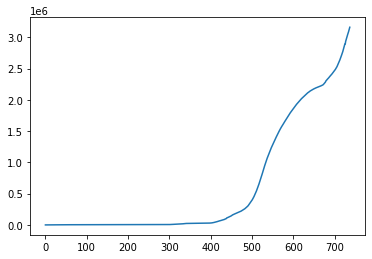

In [6]:
plt.plot(data)
plt.show()

In [7]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [8]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [9]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data)
dataset 

array([[0.00000000e+00],
       [3.16335669e-07],
       [3.16335669e-07],
       [3.16335669e-07],
       [1.58167834e-06],
       [1.89801401e-06],
       [2.53068535e-06],
       [2.53068535e-06],
       [2.53068535e-06],
       [3.47969236e-06],
       [5.37770637e-06],
       [8.85739873e-06],
       [1.04390771e-05],
       [1.26534268e-05],
       [2.27761682e-05],
       [3.32152452e-05],
       [4.27053153e-05],
       [5.37770637e-05],
       [7.27572038e-05],
       [8.85739873e-05],
       [1.16727862e-04],
       [1.76198968e-04],
       [2.14791919e-04],
       [2.48323500e-04],
       [2.82171417e-04],
       [3.17284676e-04],
       [3.46071222e-04],
       [3.80551810e-04],
       [4.25787810e-04],
       [4.68809461e-04],
       [5.08984091e-04],
       [5.46944371e-04],
       [5.79843281e-04],
       [6.12425855e-04],
       [6.40579729e-04],
       [6.72845968e-04],
       [6.88979087e-04],
       [7.00999842e-04],
       [7.36113101e-04],
       [7.53195228e-04],


In [10]:
# split into train and test sets
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

print(len(train), len(test))
train.shape, test.shape

516 222


((516, 1), (222, 1))

In [11]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [12]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [13]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [14]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 96        
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


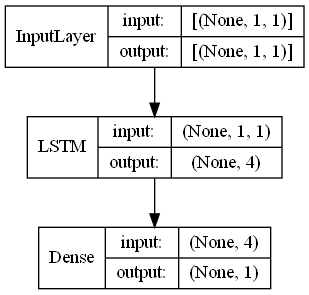

In [15]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'data_lstm.png', show_shapes=True, show_layer_names=False)

In [16]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=1)

Epoch 1/50
514/514 [==============================] - 2s 1ms/step - loss: 0.0012
Epoch 2/50
514/514 [==============================] - 1s 1ms/step - loss: 9.5371e-04
Epoch 3/50
514/514 [==============================] - 1s 1ms/step - loss: 5.8302e-04
Epoch 4/50
514/514 [==============================] - 1s 1ms/step - loss: 2.1878e-04
Epoch 5/50
514/514 [==============================] - 1s 1ms/step - loss: 3.5100e-05
Epoch 6/50
514/514 [==============================] - 1s 1ms/step - loss: 2.2092e-06
Epoch 7/50
514/514 [==============================] - 1s 1ms/step - loss: 1.3815e-07
Epoch 8/50
514/514 [==============================] - 1s 1ms/step - loss: 1.1691e-07
Epoch 9/50
514/514 [==============================] - 1s 2ms/step - loss: 1.2262e-07
Epoch 10/50
514/514 [==============================] - 1s 1ms/step - loss: 1.2533e-07
Epoch 11/50
514/514 [==============================] - 1s 1ms/step - loss: 1.3931e-07
Epoch 12/50
514/514 [==============================] - 1s 1ms/step 

In [17]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 945.34 RMSE
Test Score: 255832.96 RMSE


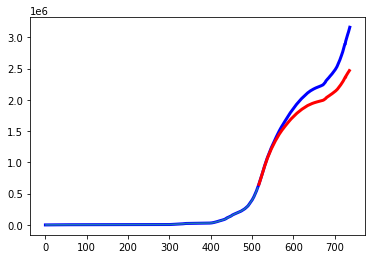

In [26]:
# shift train predictions for plotting
import numpy

trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), 'blue', lw=3.0, label='Actual')
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot, 'r', lw=3.0, label='Predicted')
plt.show()

In [20]:
#https://medium.com/datawiz-th/%E0%B8%A1%E0%B8%B2%E0%B8%A5%E0%B8%AD%E0%B8%87-forecast-%E0%B8%A3%E0%B8%B2%E0%B8%84%E0%B8%B2%E0%B8%AB%E0%B8%B8%E0%B9%89%E0%B8%99%E0%B9%81%E0%B8%9A%E0%B8%9A%E0%B8%87%E0%B9%88%E0%B8%B2%E0%B8%A2%E0%B9%86-%E0%B8%94%E0%B9%89%E0%B8%A7%E0%B8%A2-deep-learning-lstm-python-305c480db223
# ทำ prediction
yhat = model.predict(testX)
test_X = testX.reshape((testX.shape[0], testX.shape[2]))
test_X


array([[0.20031703],
       [0.20629609],
       [0.21268607],
       [0.21930381],
       [0.22606676],
       [0.23297489],
       [0.23929623],
       [0.24549736],
       [0.25177441],
       [0.25842948],
       [0.26563623],
       [0.27304418],
       [0.28003077],
       [0.28695283],
       [0.29364554],
       [0.30001275],
       [0.30650237],
       [0.31311442],
       [0.319394  ],
       [0.32590134],
       [0.33191615],
       [0.33744918],
       [0.34287908],
       [0.34870503],
       [0.35455756],
       [0.36047367],
       [0.36616265],
       [0.37139358],
       [0.37644609],
       [0.38108547],
       [0.38576787],
       [0.39049898],
       [0.39513425],
       [0.40017727],
       [0.40506529],
       [0.4094902 ],
       [0.41386227],
       [0.41834665],
       [0.42341782],
       [0.42797401],
       [0.43277946],
       [0.43721733],
       [0.44119779],
       [0.44492612],
       [0.44929092],
       [0.45368703],
       [0.4582913 ],
       [0.462